# Prospecção de Dados 2021/2022
## First Home Assignment - NB Classification Models
### Group 4
Students
- Catarina Canastra, nº57766
- Daniel Dias, nº59056
- João Raimundo, nº57454

# Task 0 - Raw Data Inference

## 0.1 - Import Libraries

In [7]:
import time
from collections import Counter
import matplotlib.pyplot as plt

# basic libraries and packages
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.preprocessing import OneHotEncoder

# preprocessing and optimization
from sklearn.preprocessing import StandardScaler


# evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

## 0.2 - Import Dataset

In [8]:
# read data file as csv and convert to dataframe
df = pd.read_csv("PD_21_22_HA1_dataset.txt", sep="\t")
df

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,40,0.565,0.292,8,-13.124,1,0.0255,0.889000,0.001260,0.1120,0.2170,78.535,3.503633,1,0
1,1,0.558,0.439,1,-9.676,1,0.0274,0.248000,0.001650,0.1020,0.0381,103.958,4.947117,1,0
2,21,0.472,0.534,2,-10.742,0,0.0342,0.760000,0.086100,0.0893,0.3830,184.014,4.972833,1,0
3,35,0.594,0.619,1,-11.123,0,0.0478,0.597000,0.000144,0.0694,0.3850,89.691,5.835783,1,0
4,21,0.732,0.550,2,-8.711,0,0.0397,0.809000,0.091000,0.0914,0.2350,132.974,6.133783,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11808,42,0.370,0.476,3,-12.730,0,0.0535,0.101000,0.002520,0.0779,0.2940,119.337,344400.000000,5,10
11809,30,0.388,0.968,8,-4.736,1,0.0686,0.000993,0.001450,0.9130,0.4120,128.907,387874.000000,5,10
11810,29,0.393,0.623,9,-13.091,1,0.0476,0.128000,0.001060,0.0919,0.2860,165.069,408000.000000,5,10
11811,21,0.305,0.501,2,-10.179,0,0.0337,0.098400,0.419000,0.1380,0.3490,90.574,422213.000000,5,10


## 0.3. - Understanding Data

This task focuses in understanding better the features, their distribution of values, potential errors, etc and plan/describe what data preprocessing steps should be performed next. Also includes the check of distribution of values in the target (class distribution).

### Checking for Data Types

We looked at each column's data types to see if there were any mislabeled data types.

In [9]:
df.dtypes

Popularity              int64
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

And we noticed that all features were well labeled.

### Checking for missing values

In [10]:
df.isnull().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

From the output above we can see that there were no NaN values detected in the whole data set. So, it was not necessary to do any missing value imputation.

### Profile Report

In [11]:
profile = ProfileReport(df, title="PD_TPC1_Music")
profile.to_file("PD_TPC1_Music.html")

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Checking for duplicates

In [12]:
Counter(df.duplicated())

Counter({False: 11787, True: 26})

There are 26 duplicated values that we need to delete.

#### Delete duplicates

In [13]:
df = df.drop_duplicates()

### Summary of the dataset

Descriptive statistics include those that summarize the central tendency, dispersion and shape of the data set distribution, excluding NaN values.

Note: the 'describe()' function only prints the statistics for the quantitative or numerical variable.

In [14]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,11787.000000,11787.000000,11787.000000,11787.000000,11787.000000,11787.000000,11787.000000,11787.000000,11787.000000,11787.000000,11787.000000,11787.000000,1.178700e+04,11787.000000,11787.000000
mean,43.081191,0.525118,0.670196,5.972851,-8.215742,0.623823,0.071119,0.240128,0.179171,0.195080,0.470023,122.919546,2.126404e+05,3.913973,6.621617
std,16.563079,0.166008,0.242360,3.167362,4.241738,0.484446,0.067824,0.319212,0.303928,0.159755,0.244582,29.420006,1.150518e+05,0.381657,3.246144
min,1.000000,0.064400,0.000020,1.000000,-36.214000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,32.000000,0.414000,0.512500,3.000000,-9.995000,0.000000,0.034600,0.001890,0.000096,0.096900,0.271000,100.000500,1.754295e+05,4.000000,5.000000
50%,42.000000,0.527000,0.716000,6.000000,-7.314000,1.000000,0.046300,0.056200,0.004290,0.127000,0.462000,120.044000,2.177730e+05,4.000000,8.000000
75%,54.000000,0.638000,0.875000,9.000000,-5.340000,1.000000,0.076500,0.422000,0.209500,0.256000,0.660000,141.844000,2.634400e+05,4.000000,10.000000
max,98.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.935000,0.996000,0.996000,0.992000,0.980000,217.416000,1.477187e+06,5.000000,10.000000


With this descriptive table, we are able to confirm previous observations made regarding the existence of null values in which was stated that all features have the same number of elements.

Furthermore, we can observe the different statistics regarding each feature, such as the mean, the standard deviation, minimum, maximum values and the different quantiles.

### Checking for imbalance dataset

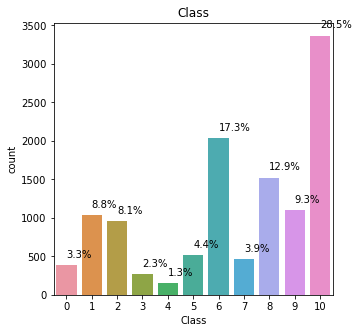

In [15]:
#Check for imbalance dataset
target = df["Class"]
plt.figure(figsize=(5, 5))
cplot = sns.countplot(x="Class", data=df)
plt.title("Class")

total = len(df["Class"])

for p in cplot.axes.patches:
    #Get percentages for classes
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 100
    cplot.annotate(percentage, (x, y))

plt.show()

We can see through the above graph that the dataset at hand is slightly unbalanced with the predominance of songs of class 10, 6, and 8.

This can seriously hamper the prediction capacity of the model, because it will lead to higher accuracy on predictions that involve these classes and, on the other hand, lower accuracy scores on the remaining classes.

### Getting Correlations between the Features

<AxesSubplot:>

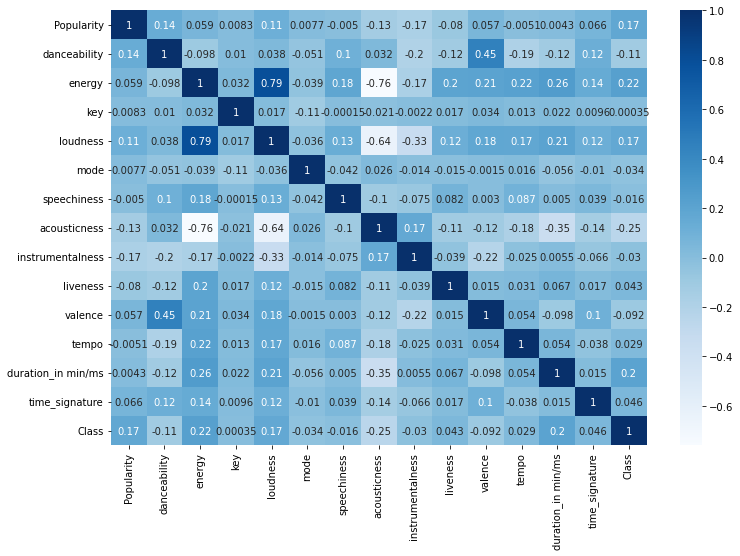

In [16]:
#Plot a correlation matrix for features
plt.figure(figsize=(12, 8))
corr = df.corr()
corr_matrix = sns.heatmap(corr, cbar=True, annot=True, cmap="Blues")
corr_matrix

With the correlation matrix plotted on a heatmap, we can see which features are related to each other.
Of all the correlations, the most notable are among the variables:
- "danceability" and "valence" (~ 0.6) (the more suitable a track is for dancing, the greater the musical positivity conveyed by that track);
- "energy" and "loudness" (~ 0.8) (the intensity and activity of a track, that is, whether it is fast, loud, noisy, is highly correlated with its overall volume);

Without further detailed descriptions of the variables, we aren't able to provide meaningfull insights into the correlations between the different variables.


### Detection Outlier

In [17]:
scalar = StandardScaler()
x = df.copy(deep=True)
column_names = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                'valence', 'tempo', 'duration_in min/ms']
#Select numerical features
x = x[column_names].values
#Standardized values
x_standard = scalar.fit_transform(x)

standard_df = pd.DataFrame(x_standard, columns=column_names)
standard_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,0.240252,-1.560538,-1.157183,-0.672644,2.032815,-0.585395,-0.520067,-1.034554,-1.508716,-1.848263
1,0.198084,-0.953976,-0.344274,-0.644629,0.024662,-0.584112,-0.582666,-1.766035,-0.644539,-1.848250
2,-0.319986,-0.561980,-0.595597,-0.544365,1.628678,-0.306239,-0.662166,-0.355817,2.076718,-1.848250
3,0.414950,-0.211247,-0.685422,-0.343838,1.118024,-0.589067,-0.786737,-0.347639,-1.129502,-1.848243
4,1.246271,-0.495960,-0.116763,-0.463270,1.782187,-0.290116,-0.649020,-0.960956,0.341770,-1.848240
...,...,...,...,...,...,...,...,...,...,...
11782,-0.934440,-0.801304,-1.064292,-0.259793,-0.435866,-0.581249,-0.733528,-0.719718,-0.121778,1.145268
11783,-0.826007,1.228823,0.820392,-0.037149,-0.749172,-0.584770,4.494070,-0.237242,0.203525,1.523149
11784,-0.795887,-0.194742,-1.149402,-0.346787,-0.351279,-0.586053,-0.645890,-0.752428,1.432741,1.698086
11785,-1.326004,-0.698147,-0.462862,-0.551738,-0.444012,0.789132,-0.357311,-0.494835,-1.099487,1.821627


In [18]:
#Create dictionarie with the number of outliers for each feature
outliers = dict()
for i, val in enumerate(standard_df.columns):
    outliers[val] = dict()
    outliers[val]["count"] = len(np.where(abs(standard_df[val].values) > 3)[0])
    outliers[val]["propotion"] = outliers[val]["count"] / standard_df[val].shape[0]

outliers = pd.DataFrame(data=outliers).T
outliers

,count,propotion
danceability,0.0,0.000000
energy,0.0,0.000000
loudness,223.0,0.018919
speechiness,314.0,0.026640
acousticness,0.0,0.000000
instrumentalness,0.0,0.000000
liveness,309.0,0.026215
valence,0.0,0.000000
tempo,10.0,0.000848
duration_in min/ms,95.0,0.008060


In order to detect the outliers present in the dataset, it was applied the standardization of the dataframe, by having one unit variance and 0 mean. This is also known as the Z-score. Consequently, every value that is higher than 3 or lesser than -3 it is considered an outlier [1].
When analysing the frequency and propotion of outliers  per feature, it is concluded that the propotion of outliers within the dataset is not very significant in the context of the problem.

# 1 - Preprocessing the Dataset for Classification

### Defining Functions

In [19]:
# One hot encoding of categorical features to binary 0,1 or boolean

def ohencode(to_encode, boolean=False):
    enc = OneHotEncoder()
    encoded = enc.fit_transform(to_encode).toarray()
    encoded = pd.DataFrame(encoded, columns=enc.get_feature_names(to_encode.columns))

    return encoded

In [20]:
# Feature Selection Forward Wrapper Method

def forward_selected(x_train, y_train, classifier, features, ohe_features, ohe_columns, file_name='outputs.txt'):
    start = time.time()

    # Features that will be tested
    remaining = list(features)

    # In this selected list, we will input the variables that improve the model (F1 Score)
    selected = []

    f1_score, new_f1_score = 0.0, 0.0
    iteration = 0

    while remaining and f1_score <= new_f1_score and iteration < len(list(features)):
        ##print("\nIteration:", iteration)
        resume = []
        for i in range(len(remaining)):  # for each feature
            #print("\nCandidate:", remaining[i])
            #print("Selected: ", selected)
            #print("Remaining: ", remaining)
            new_candidate = [remaining[i]]

            # if the candidate feature is one hot encoded
            # adds all its columns as a single candidate (by column name)
            if remaining[i] in ohe_features:
                new_candidate = list(filter(lambda x: remaining[i] in x, ohe_columns))
            #print("New Candidate: ", new_candidate)
            candidates = selected + new_candidate

            # Train and test the model with the selected features + the candidate for this round
            new_f1_score = cross_val_score(classifier, x_train[candidates], y_train.ravel(), cv=10, scoring='f1_macro')
            new_f1_score = new_f1_score.mean().round(4)

            #print("F1 Score: ", new_f1_score, "\n")
            # save the score for each candidate entering the classifier
            resume.append((new_f1_score, remaining[i]))

        #print("Final for:")

        # sort the candidate feature is in the last place
        resume.sort()

        #print("Resume", resume)
        # extract the score and the name of the best candidate feature
        new_f1_score, best_candidate = resume.pop()
        #print("Best Candidate: ", best_candidate)
        #print("F1-Score: ", f1_score)
        #print("New F1-Score: ", new_f1_score)

        # if the new score is better than the previous one (with one less variable)
        # the feature is removed from the remaining list and added to the selected list
        if f1_score < new_f1_score:
            #print("! ", best_candidate, " was removed from the remaining list and append to the 'selected' list", "\n")
            remaining.remove(best_candidate)
            selected.append(best_candidate)

            # if the last selected feature is one hot encoded
            # adds all its columns to the selected set
            if selected[-1] in ohe_features:
                last_selected = selected[-1]
                selected.pop()
                selected += list(filter(lambda x: last_selected in x, ohe_columns))
            #print("Selected:", selected)
            #print("Remaining:", remaining)
            f1_score = new_f1_score

        iteration += 1

    # print output
    #print("\n\n")
    #print("Selected Features: ", selected, "\n")
    #print("Final F1-Score: ", f1_score, "\n")
    #print("Total Time: ", time.time() - start, "\n\n")
    
    # save output
    output = open(file_name, "a")
    print("Selected Features: ", selected, "\n", "Final F1-Score: ",
          f1_score, "\n", "Total Time(s): ", time.time() - start, "\n\n", file=output)


In [21]:
# Discretize numerical features into the following classes - Low, Medium, High - taking into account the quantile distribution

def numerical_descritization(numerical_data):
    cnames = numerical_data.columns
    newdf = numerical_data.copy(deep=True)
    newdf.iloc[:, :] = "Medium"
    for i, cname in enumerate(cnames):
        q33, q67 = np.quantile(numerical_data.iloc[:, i], (0.33, 0.67))
        newdf.iloc[numerical_data.iloc[:, i] < q33, i] = "Low"
        newdf.iloc[numerical_data.iloc[:, i] > q67, i] = "High"
    return newdf


### Label features by data type

In [22]:
# label features by data type

numerical = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
             'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms']

categorical = ['key', 'mode', 'time_signature']

features = list(numerical) + list(categorical)

meta = ['Popularity']

target = ['Class']

### Features and Target sets

In [23]:
# define features and target
ypd_NB = df['Class']
Xpd_NB = df.drop(columns=target).drop(columns=meta)

### Discretize Numerical Features

In [24]:
# discretize numerical features
numerical_df = numerical_descritization(Xpd_NB[numerical])

# merge numerical_df and categorical features in the same df
Xpd_NB_descritized = pd.concat([Xpd_NB[categorical], numerical_df], axis=1)

### One Hot Enconding Features set

In [25]:
# encode features - One Hot Encoding
Xpd_NB_encoded = ohencode(Xpd_NB_descritized)
Xpd_NB_encoded

C:\ProgramData\Anaconda3\envs\TPC1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,...,liveness_Medium,valence_High,valence_Low,valence_Medium,tempo_High,tempo_Low,tempo_Medium,duration_in min/ms_High,duration_in min/ms_Low,duration_in min/ms_Medium
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11782,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
11783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
11784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11785,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


# 2. Objective 1 - Multiclasse Classification Model

In [26]:
# Split the dataset into train and validation set

X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(Xpd_NB_encoded.values, ypd_NB.values,
                                                                    stratify=ypd_NB.values)

X_train_NB = pd.DataFrame(X_train_NB, columns=Xpd_NB_encoded.columns)
X_test_NB = pd.DataFrame(X_test_NB, columns=Xpd_NB_encoded.columns)

## 2.1. - Best Features Selection

### 2.1.1. Select Best Features for NB Gaussian Classifier

In [81]:
# infer best features for the multiclass model- GaussianNB
forward_selected(X_train_NB, y_train_NB, GaussianNB(),
                 X_train_NB.columns, X_train_NB.columns, X_train_NB.columns, file_name='features-NB-Gaussian-Multi.txt')
print("\n\n")




Selected Features:  ['instrumentalness_High', 'acousticness_High', 'duration_in min/ms_Low', 'valence_High', 'danceability_High', 'speechiness_Low', 'speechiness_Medium', 'duration_in min/ms_High', 'loudness_Low', 'energy_Medium', 'key_9', 'energy_Low', 'time_signature_3', 'valence_Medium'] 

Final F1-Score:  0.3107 

Total Time:  46.997660875320435 







### 2.1.2. Select Best Features and alpha value for NB Categorical Classifier

In [95]:
# infer best features for the multiclass model - CategoricalNB
''''
output = open("features-NB-Categorical-Multi.txt", "a")

for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    print("With Alpha = ", i)
    forward_selected(X_train_NB, y_train_NB, CategoricalNB(alpha=i), X_train_NB.columns, X_train_NB.columns,
                     X_train_NB.columns, file_name='features-NB-Categorical-Multi.txt')
    print("\n", file=output)

print(output.read())
output.close()
'''    
# open results
CatNB_features_results = open("features-NB-Categorical-Multi.txt", "r")
print(CatNB_features_results.read())

With Alpha =  0.1



Selected Features:  ['instrumentalness_High', 'duration_in min/ms_Low', 'acousticness_High', 'valence_High', 'danceability_High', 'speechiness_High', 'speechiness_Low', 'time_signature_3', 'acousticness_Low', 'instrumentalness_Low', 'energy_Medium', 'valence_Low', 'energy_High', 'key_1', 'key_10', 'key_11', 'duration_in min/ms_High', 'danceability_Low', 'liveness_High', 'key_10', 'key_5', 'key_6'] 

Final F1-Score:  0.3936 

Total Time:  124.69337630271912 




With Alpha =  0.2



Selected Features:  ['instrumentalness_High', 'duration_in min/ms_Low', 'acousticness_High', 'valence_High', 'danceability_High', 'speechiness_High', 'speechiness_Low', 'time_signature_3', 'acousticness_Low', 'instrumentalness_Low', 'energy_Medium', 'valence_Low', 'energy_High', 'key_1', 'key_10', 'key_11', 'duration_in min/ms_High', 'key_5', 'key_9', 'valence_Medium', 'key_10', 'time_signature_1'] 

Final F1-Score:  0.3904 

Total Time:  127.65800261497498 




With Alpha =  0.3



Sele

Text(0, 0.5, 'F1-Score')

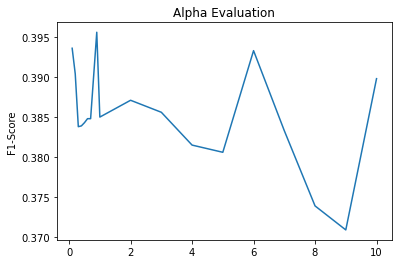

In [4]:
alpha=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
scores=[0.3936, 0.3904, 0.3838, 0.3839, 0.3843, 0.3848, 0.3848, 0.3902, 0.3956, 0.385, 0.3871, 0.3856, 0.3815, 0.3806, 0.3933, 0.3833, 0.3739, 0.3709, 0.3898]

plt.plot(alpha,scores)
plt.title('Alpha Evaluation')
plt.ylabel("F1-Score")

## 2.2. Training NB Models

### 2.2.1. Train NB Gaussian Model with the best selected features

In [97]:
# Training NB Gaussian model with the best selected features

NBGauss_selected = ['instrumentalness_High', 'acousticness_High', 'duration_in min/ms_Low',
                    'valence_High', 'danceability_High', 'speechiness_Low', 'speechiness_Medium',
                    'duration_in min/ms_High', 'loudness_Low', 'energy_Medium', 'key_9', 
                    'energy_Low','time_signature_3', 'valence_Medium']


# train model
classifier_NBGauss = GaussianNB().fit(X_train_NB[NBGauss_selected], y_train_NB.ravel())

# predict model
y_pred_NBGauss = classifier_NBGauss.predict(X_test_NB[NBGauss_selected])

# f1-score
NBGauss_test_f1 = f1_score(y_test_NB, y_pred_NBGauss, average='macro')
print("Test set F1-Score:",NBGauss_test_f1, "\n")

# scores report
print("NB Gaussian Multiclass Classification Report - Test Set\n\n",
      classification_report(y_test_NB, y_pred_NBGauss, zero_division=0))


Test set F1-Score: 0.2978507168305944 

NB Gaussian Multiclass Classification Report - Test Set

               precision    recall  f1-score   support

           0       0.15      0.56      0.24        96
           1       0.00      0.00      0.00       258
           2       0.22      0.18      0.20       239
           3       0.24      0.42      0.31        67
           4       0.06      0.51      0.11        37
           5       0.31      0.38      0.34       129
           6       0.42      0.22      0.29       509
           7       0.62      0.91      0.74       116
           8       0.42      0.71      0.53       380
           9       0.25      0.17      0.20       275
          10       0.41      0.27      0.33       841

    accuracy                           0.32      2947
   macro avg       0.28      0.39      0.30      2947
weighted avg       0.34      0.32      0.31      2947



Text(0.5, 1.0, 'Predicting Target - NB Gaussian - Test Set')

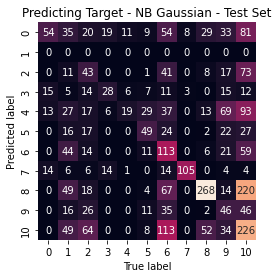

In [99]:
# Confusion Matrix - test set
cm_test_NBGauss = confusion_matrix(y_test_NB, y_pred_NBGauss, labels=classifier_NBGauss.classes_)
 

sns.heatmap(cm_test_NBGauss.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classifier_NBGauss.classes_,
            yticklabels=classifier_NBGauss.classes_)

plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.title('Multiclass Model - NB Gaussian - Test Set')

### 2.2.2. Train NB Categorical Model with the best selected features

In [100]:
# Training NB Gaussian model with the best selected features

NBCat_selected = ['instrumentalness_High', 'duration_in min/ms_Low', 'acousticness_High', 
                  'valence_High', 'danceability_High', 'speechiness_High', 'speechiness_Low',
                  'time_signature_3', 'acousticness_Low', 'valence_Low', 'energy_Medium',
                  'instrumentalness_Low', 'duration_in min/ms_High', 'key_5', 'loudness_High',
                  'key_2', 'key_3', 'tempo_Medium', 'tempo_Low', 'key_4', 'key_9', 'mode_1',
                  'liveness_High', 'time_signature_4']


# train model
classifier_NBCat = CategoricalNB(alpha=0.9).fit(X_train_NB[NBCat_selected], y_train_NB.ravel())

# predict
y_pred_NBCat = classifier_NBCat.predict(X_test_NB[NBCat_selected])


# f1-score
NBCat_test_f1 = f1_score(y_test_NB, y_pred_NBCat, average='macro')
print("Test set F1-Score:",NBCat_test_f1, "\n")

# scores report
print("NB Categorical Multiclass Classification Report - Test Set\n\n",
      classification_report(y_test_NB, y_pred_NBCat, zero_division=0))


Test set F1-Score: 0.3833770844695224 

NB Categorical Multiclass Classification Report - Test Set

               precision    recall  f1-score   support

           0       0.31      0.41      0.35        96
           1       0.00      0.00      0.00       258
           2       0.29      0.23      0.25       239
           3       0.34      0.43      0.38        67
           4       0.25      0.41      0.31        37
           5       0.38      0.54      0.45       129
           6       0.38      0.34      0.36       509
           7       0.63      0.92      0.75       116
           8       0.50      0.67      0.57       380
           9       0.36      0.33      0.34       275
          10       0.44      0.47      0.45       841

    accuracy                           0.42      2947
   macro avg       0.35      0.43      0.38      2947
weighted avg       0.37      0.42      0.39      2947



Text(0.5, 1.0, 'Predicting Target - NB Categorical - Test Set')

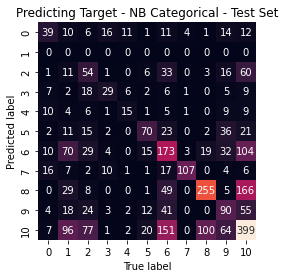

In [101]:
# Confusion Matrix - test set
cm_test_NBCat = confusion_matrix(y_test_NB, y_pred_NBCat, labels=classifier_NBCat.classes_)
 

sns.heatmap(cm_test_NBCat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classifier_NBCat.classes_,
            yticklabels=classifier_NBCat.classes_)

plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.title('Multiclass Model - NB Categorical - Test Set')

# 3. Objective 2 - Binary Classification Model

In [28]:
# copy Xpd_NB_encoded dataframe
ypd_NB_Bi = ypd_NB.copy(deep=True)

# transform into dataframe
ypd_NB_Bi = pd.DataFrame(ypd_NB_Bi)

# Converts all values that are 4 to 1's and everything else into 0's
ypd_NB_Bi = ypd_NB_Bi.applymap(lambda n: 1 if n == 4 else 0)

In [29]:
# Split the dataset into train and validation set
X_train_NB_Bi, X_test_NB_Bi, y_train_NB_Bi, y_test_NB_Bi = train_test_split(Xpd_NB_encoded.values, ypd_NB_Bi.values,
                                                                            stratify=ypd_NB.values)

X_train_NB_Bi = pd.DataFrame(X_train_NB_Bi, columns=Xpd_NB_encoded.columns)
X_test_NB_Bi = pd.DataFrame(X_test_NB_Bi, columns=Xpd_NB_encoded.columns)

## 3.1. - Best Features Selection

### 3.1.1. Select Best Features for NB Gaussian Classifier

In [130]:
# infer best features for the binary classification model - NB Gaussian
forward_selected(X_train_NB_Bi, y_train_NB_Bi, GaussianNB(),
                 X_train_NB_Bi.columns, X_train_NB_Bi.columns, X_train_NB_Bi.columns,file_name='features-NB-Gaussian-Binary.txt')
print("\n\n")




Selected Features:  ['key_3', 'mode_1', 'acousticness_Low', 'mode_0', 'tempo_Medium'] 

Final F1-Score:  0.5297 

Total Time:  107.96800971031189 







### 3.1.2. Select Best Features and alpha value for NB Categorical Classifier

In [136]:
# infer best features for the binary classification model - NB Categorical
'''
output = open('features-NB-Categorical-Binary.txt', "a")

for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    print("With Alpha = ", i)
    forward_selected(X_train_NB_Bi, y_train_NB_Bi, CategoricalNB(alpha=i), X_train_NB_Bi.columns, X_train_NB_Bi.columns,
                     X_train_NB_Bi.columns, file_name='features-NB-Categorical-Binary.txt')
    print("\n")

print(output.read())
output.close()
'''

# open results
CatNB_features_results_bi = open("features-NB-Categorical-Binary.txt", "r")
print(CatNB_features_results_bi.read())


With Alpha =  0.1



Selected Features:  ['valence_Medium'] 

Final F1-Score:  0.4968 

Total Time:  114.8920042514801 




With Alpha =  0.2



Selected Features:  ['valence_Medium'] 

Final F1-Score:  0.4968 

Total Time:  116.8999969959259 




With Alpha =  0.3



Selected Features:  ['valence_Medium'] 

Final F1-Score:  0.4968 

Total Time:  117.45503067970276 




With Alpha =  0.4



Selected Features:  ['valence_Medium'] 

Final F1-Score:  0.4968 

Total Time:  111.042973279953 




With Alpha =  0.5



Selected Features:  ['valence_Medium'] 

Final F1-Score:  0.4968 

Total Time:  113.47500038146973 




With Alpha =  0.6



Selected Features:  ['valence_Medium'] 

Final F1-Score:  0.4968 

Total Time:  113.11900043487549 




With Alpha =  0.7



Selected Features:  ['valence_Medium'] 

Final F1-Score:  0.4968 

Total Time:  106.82468938827515 




With Alpha =  0.8



Selected Features:  ['valence_Medium'] 

Final F1-Score:  0.4968 

Total Time:  109.65296912193298 




With

Text(0, 0.5, 'F1-Score')

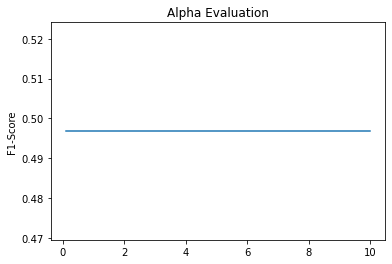

In [5]:
alpha=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
scores=[0.4968, 0.4968, 0.4968, 0.4968, 0.4968, 0.4968, 0.4968, 0.4968, 0.4968, 0.4968, 0.4968, 0.4968, 0.4968, 0.4968, 0.4968, 0.4968, 0.4968, 0.4968, 0.4968]

plt.plot(alpha,scores)
plt.title('Alpha Evaluation')
plt.ylabel("F1-Score")

Considering we could not find a set of best selected features, once the F1-score is equal for all alpha values and the selected features set were only 'valence_Medium' for all alpha iterations, so we considered an alpha of 1 (the default value in scikit-learn).

## 3.2. Training NB Models

### 3.2.1. Train NB Gaussian Model with the best selected features

In [144]:
# Training NB Gaussian model with the best selected features

NBGauss_selected_Bi = ['key_3', 'mode_1', 'acousticness_Low', 'mode_0', 'tempo_Medium']


# train model
classifier_NBGauss_Bi = GaussianNB().fit(X_train_NB_Bi[NBGauss_selected_Bi], y_train_NB_Bi.ravel())

# predict model
y_pred_NBGauss_Bi = classifier_NBGauss_Bi.predict(X_test_NB_Bi[NBGauss_selected_Bi])

# f1-score
NBGauss_test_f1_Bi = f1_score(y_test_NB_Bi, y_pred_NBGauss_Bi, average='macro')
print("Test set F1-Score:",NBGauss_test_f1_Bi, "\n")

# scores report
print("NB Gaussian Binary Classification Report - Test Set\n\n",
      classification_report(y_test_NB_Bi, y_pred_NBGauss_Bi, zero_division=0))

Test set F1-Score: 0.5180682718385569 

NB Gaussian Binary Classification Report - Test Set

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2910
           1       0.05      0.05      0.05        37

    accuracy                           0.97      2947
   macro avg       0.52      0.52      0.52      2947
weighted avg       0.98      0.97      0.97      2947



Text(0.5, 1.0, 'Binary Class Model - NB Gaussian - Test Set')

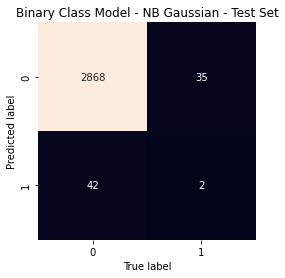

In [145]:
# Confusion Matrix - test set
cm_test_NBGauss_Bi = confusion_matrix(y_test_NB_Bi, y_pred_NBGauss_Bi, labels=classifier_NBGauss_Bi.classes_)
 

sns.heatmap(cm_test_NBGauss_Bi.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classifier_NBGauss_Bi.classes_,
            yticklabels=classifier_NBGauss_Bi.classes_)

plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Binary Class Model - NB Gaussian - Test Set')

### 3.2.2. Train NB Categorical Model with the best selected features

In [30]:
# Training NB Gaussian model with the best selected features

NBCat_selected_Bi = ['valence_Medium']


# train model
classifier_NBCat_Bi = CategoricalNB(alpha=1).fit(X_train_NB_Bi[NBCat_selected_Bi], y_train_NB_Bi.ravel())

# predict
y_pred_NBCat_Bi = classifier_NBCat_Bi.predict(X_test_NB_Bi[NBCat_selected_Bi])


# f1-score
NBCat_test_f1_Bi = f1_score(y_test_NB_Bi, y_pred_NBCat_Bi, average='macro')
print("Test set F1-Score:",NBCat_test_f1_Bi, "\n")

# scores report
print("NB Categorical Binary Classification Report - Test Set\n\n",
      classification_report(y_test_NB_Bi, y_pred_NBCat_Bi, zero_division=0))


Test set F1-Score: 0.49684138637527747 

NB Categorical Binary Classification Report - Test Set

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2910
           1       0.00      0.00      0.00        37

    accuracy                           0.99      2947
   macro avg       0.49      0.50      0.50      2947
weighted avg       0.98      0.99      0.98      2947



Text(0.5, 1.0, 'Binary Model - NB Categorical - Test Set')

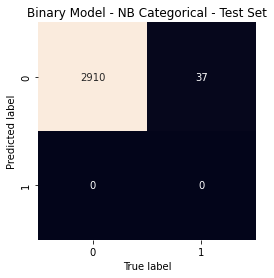

In [31]:
# Confusion Matrix - test set
cm_test_NBCat_Bi = confusion_matrix(y_test_NB_Bi, y_pred_NBCat_Bi, labels=classifier_NBCat_Bi.classes_)
 

sns.heatmap(cm_test_NBCat_Bi.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classifier_NBCat_Bi.classes_,
            yticklabels=classifier_NBCat_Bi.classes_)

plt.xlabel('True label')
plt.ylabel('Predicted label');
plt.title('Binary Model - NB Categorical - Test Set')